# Logistic regression
The purpose of this notebook is to understand and implement logistic regression. As always, you are not allowed to use any package that has a complete logistic regression framework implemented (e.g., scikit-learn).

Logistic regression, despite its name, is a linear model for classification rather than regression. In its original form, it is used for binary classifications, i.e., assigning a data point in our test set a binary label (e.g., yes or no, 0 or 1, red or blue). The reason why the term logistic *regression* is used becomes obvious once we examine the logistic function (often also called sigmoid function):
$$
f(x) = \frac{1}{1+e^{-x}}
$$
Next, you will implement the logistic function using numpy.

In [1]:
# importing standard packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_moons

In [2]:
## EDIT THIS FUNCTION - DONE
def logistic(x):
    return 1/(1 + np.exp(-x))  ## <-- EDIT THIS LINE - DONE

Let's plot the function to see how it behaves.

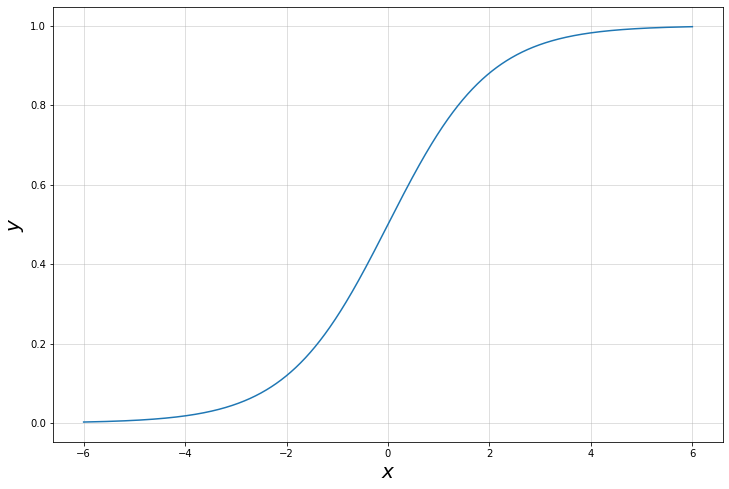

In [3]:
plt.figure(figsize=(12,8))
x = np.linspace(-6, 6, 1000)
y = logistic(x)
plt.xlabel(r'$x$', size=20)
plt.ylabel(r'$y$', size=20)
plt.grid(alpha=0.5)
plt.plot(x, y);

#### Questions:
1. Can you already guess why this _regression_ model is used in _binary classification_ tasks?
2. What do the bounds of the logistic function tell you?
- The range of the logistic function is between 0 and 1, so can be used as a probability for a Bernoulli random variable.


Let's generate now a data set with sklearn's [`make_classification`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) function:

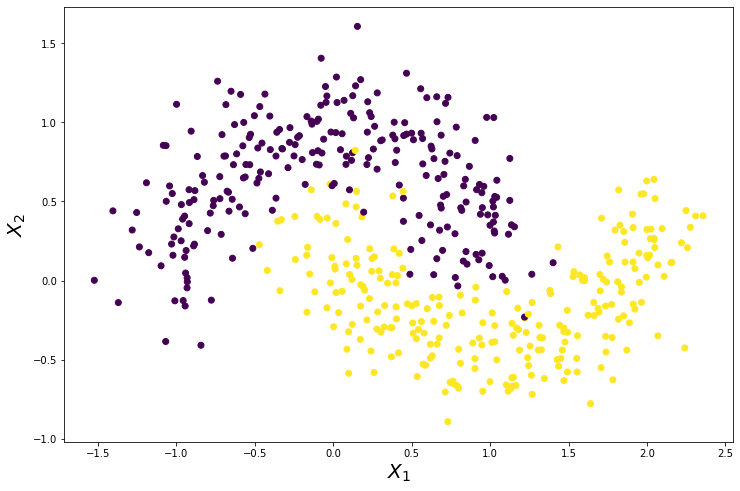

In [4]:
# X, y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, random_state=1)
X, y = make_moons(n_samples=500, noise=0.2, random_state=1)


plt.figure(figsize=(12,8))
plt.xlabel(r'$X_1$', size=20)
plt.ylabel(r'$X_2$', size=20)
plt.scatter(X[:,0], X[:,1], c=y.reshape(-1));

We divide the data set into train and test sets and run our model with your own choice of hyperparameters:

In [5]:
# stacking data X and labels y into one matrix
data = np.hstack((X, y[:, np.newaxis]))

# shuffling the rows        
np.random.shuffle(data)

# we split train to test as 70:30
split_rate = 0.7
train, test = np.split(data, [int(split_rate*(data.shape[0]))])

X_train = train[:,:-1].T
y_train = train[:, -1]

X_test = test[:,:-1].T
y_test = test[:, -1]

y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [6]:
print(X_train.shape)
print(X_test.shape)

(2, 350)
(2, 150)


In logistic regression, we learn parameters $\boldsymbol \beta$ and $\beta_0$ similar to linear regression, but pass the output through a logistic function in the end. We call the output of this operation $\hat{\boldsymbol y}_{\text{log}}$:
$$
\hat{\boldsymbol y}_{\text{log}} = f(\boldsymbol \beta^T \boldsymbol X + \beta_0)
$$
where $\boldsymbol X = [X^{(1)}, X^{(2)}, \dots, X^{(n)}]$, and $X^{(i)} \in \mathbb R^d$.

Note that $f$ is again the logistic function and, consequently, we have a _probability_ of the given data point belonging to one of the two classes, let's say red and blue. Then, you simply label any data point with probability greater than $0.5$ red, and any data point with probability less or equal to $0.5$ blue.

Implement this function in the next cell.

In [7]:
## EDIT THIS FUNCTION - DONE
def predict_log(X, beta, beta_0):
  y_log = logistic(beta.T @ X + beta_0)  ## <-- EDIT THIS LINE - DONE
  return y_log

A common technique in machine learning is to initialise the parameters $\boldsymbol \beta$ and $\beta_0$ randomly or with zeros; we do the latter here.

In [8]:
def initialise(d):
  """    
  Argument:
  d: size of the beta vector (or number of parameters)
  
  Returns:
  beta: initialised vector of shape (d, 1)
  beta_0: initialised scalar (corresponds to the offset)
  """
  
  beta = np.zeros(shape=(d, 1), dtype=np.float32)
  beta_0 = 0
  
  assert(beta.shape==(d, 1))
  assert(isinstance(beta_0, float) or isinstance(beta_0, int))
  
  return beta, beta_0

From our lectures we know that the cost function to be minimised is given by
$$
\mathcal L = - \frac{1}{n} \sum_{i=1}^n y^{(i)} \log(\hat{y}_{\text{log}}^{(i)}) + (1-y^{(i)}) \log (1-\hat{y}_{\text{log}}^{(i)}) \, .
$$
We will use gradient descent to optimise this cost function. The derivatives with respect to $\boldsymbol \beta$ and $\beta_0$ are:
$$
\frac{\partial \mathcal L}{\partial \boldsymbol \beta} = \frac{1}{n} \sum_{i=1}^n X^{(i)} (\hat{y}_{\text{log}}^{(i)} - y^{(i)})^T
$$
 
$$
\frac{\partial \mathcal L}{\partial \beta_0} = \frac{1}{n} \sum_{i=1}^n (\hat{y}_{\text{log}}^{(i)} - y^{(i)})
$$

Implement the cost function and its derivatives in the next cell as part of a larger operation which we shall call `propagate`, which is often also called a _forward pass_.

In [9]:
## EDIT THIS FUNCTION - DONE
def propagate(X, y, beta, beta_0):
  """
  Arguments:
  X: data of size (d, n)
  y: true label vector of size (1, n)
  beta: parameters, a numpy array of size (d, 1)
  beta_0: offset, a scalar

  Returns:
  cost: negative log-likelihood cost for logistic regression
  dbeta: gradient of the loss with respect to beta
  dbeta_0: gradient of the loss with respect to beta_0
  """
  n = X.shape[1]
  y_log = predict_log(X, beta, beta_0)

  # cost function
  ## EDIT THIS LINE below (hint: don't forget axis=1 when using np.mean) - DONE
  # Note to self: np.multiply instead of @
  cost = (-1) * np.mean(np.multiply(y, np.log(y_log)) + np.multiply((1-y), np.log(1-y_log)), axis = 1) 

  # derivatives
  # Note to self: vector operations instead of np.sum
  dbeta = (1/n) * X @ (y_log - y).T  ## <-- EDIT THIS LINE - DONE
  dbeta_0 =  np.mean(y_log - y, axis = 1)  ## <-- EDIT THIS LINE - DONE

  assert(dbeta.shape==beta.shape)
  assert(dbeta_0.dtype==float)
  cost = np.squeeze(cost)
  assert(cost.shape==())
  
  # store gradients in a dictionary
  grads = {"dbeta": dbeta, "dbeta_0": dbeta_0}
  
  return grads, cost

With these gradients and the cost, we can conduct the actual optimisation and update the $\boldsymbol \beta$ and $\beta_0$ with a learning rate $\alpha$, which we shall set to $0.005$. You are required to implement the updating procedure for $\boldsymbol \beta$
$$
\boldsymbol \beta = \boldsymbol \beta - \alpha \ \frac{\partial \mathcal L}{\partial \boldsymbol \beta}
$$
and for offset $\beta_0$
$$
\beta_0 = \beta_0 - \alpha \ \frac{\partial \mathcal L}{\partial \beta_0} \, .
$$

In [10]:
## EDIT THIS FUNCTION
def optimise(X, y, beta, beta_0, num_iterations=1000, learning_rate=0.005, print_cost=False):
  """
  Arguments:
  X: data of size (d, n)
  y: true label vector of size (1, n)
  beta: parameters, a numpy array of size (d, 1)
  beta_0: offset, a scalar
  num_iterations: number of iterations gradient descent shall update the parameters
  learning_rate: step size in updating procedure
  print_cost: whether to print the cost every 100 iterations or not

  Returns:
  params: dictionary containing the parameters beta and offset beta_0
  grads: dictionary containing the gradients
  costs: list of all the costs computed during the optimisation (can be used to plot the learning curve).
  """
  costs = []
    
  for i in range(num_iterations):

      # calculate cost and gradients (hint: use your existing functions)
      grads, cost = propagate(X, y, beta, beta_0)  ## <-- EDIT THIS LINE - DONE
      
      # retrieve derivatives from grads
      dbeta = grads["dbeta"]
      dbeta_0 = grads["dbeta_0"]
      
      # updating procedure
      beta = beta - learning_rate * dbeta  ## <-- EDIT THIS LINE - DONE
      beta_0 = beta_0 - learning_rate * dbeta_0  ## <-- EDIT THIS LINE - DONE
      
      # record the costs
      if i % 100 == 0:
          costs.append(cost)
      
      # print the cost every 100 iterations
      if print_cost and i % 100 == 0:
          print ("cost after iteration %i: %f" %(i, cost))
  
  # save parameters and gradients in dictionary
  params = {"beta": beta, "beta_0": beta_0}
  grads = {"dbeta": dbeta, "dbeta_0": dbeta_0}
  
  return params, grads, costs

Having calculated the parameters for our training sets, we can finally predict the labels for our test set.

In [11]:
## EDIT THIS FUNCTION - DONE
def predict(X_test, beta, beta_0):
  """
  Arguments:
  X_test: test data of size (d, n)
  beta: parameters, a numpy array of size (d, 1)
  beta_0: offset, a scalar

  Returns:
  y_pred: vector containing all binary predictions (0/1) for the examples in X_test
  """
  n = X_test.shape[1]
  y_pred = np.zeros((1,n))
  beta = beta.reshape(X_test.shape[0], 1)
  
  # compute vector y_log predicting the probabilities
  y_log = predict_log(X_test, beta, beta_0)
  
  for i in range(y_log.shape[1]):
      
      # convert probabilities y_log to actual predictions y_pred
      if y_log[0, i] > 0.5:
          y_pred[0, i] = 1  ## <-- EDIT THIS LINE - DONE
      else:
          y_pred[0, i] = 0  ## <-- EDIT THIS LINE - DONE
  
  assert(y_pred.shape==(1, n))
  
  return y_pred

A pythonic way to define an algorithm is placing all functions in one model that has all hyperparameters as arguments. This allows you to quickly evaluate different hyperparameters and optimise over these. So, let's do this:

In [12]:
def model(X_train, y_train, X_test, y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
  # initialize parameters with zeros
  beta, beta_0 = initialise(X_train.shape[0])

  # gradient descent
  parameters, grads, costs = optimise(X_train, y_train, beta, beta_0, num_iterations, learning_rate, print_cost=print_cost)

  # retrieve parameters beta and beta_0 from dictionary "parameters"
  beta = parameters["beta"]
  beta_0 = parameters["beta_0"]

  # predict test and train set examples
  y_pred_test = predict(X_test, beta, beta_0)
  y_pred_train = predict(X_train, beta, beta_0)

  # print train/test Errors
  print("train accuracy: {} %".format(100 - np.mean(np.abs(y_pred_train - y_train)) * 100))
  print("test accuracy: {} %".format(100 - np.mean(np.abs(y_pred_test - y_test)) * 100))

  # saving all information
  d = {"costs": costs, "y_pred_test": y_pred_test, "y_pred_train": y_pred_train, "beta": beta, "beta_0": beta_0, "learning_rate": learning_rate, "num_iterations": num_iterations}
  
  return d

In [13]:
# run the model
d = model(X_train, y_train, X_test, y_test, num_iterations=500, learning_rate=0.1, print_cost=True)

cost after iteration 0: 0.693147
cost after iteration 100: 0.398379
cost after iteration 200: 0.345394
cost after iteration 300: 0.321133
cost after iteration 400: 0.306461
train accuracy: 87.42857142857143 %
test accuracy: 86.0 %


Let's see how our cost has changed over the training iterations:

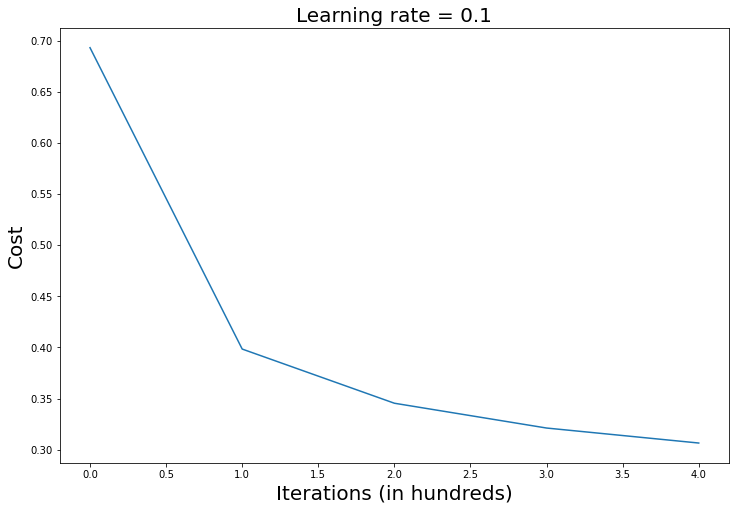

In [14]:
costs = np.squeeze(d['costs'])
plt.figure(figsize=(12,8))
plt.ylabel('Cost', size=20)
plt.xlabel('Iterations (in hundreds)', size=20)
plt.title("Learning rate = " + str(d["learning_rate"]), size=20)
plt.plot(costs);

#### Questions:
1. What insights do you gain from this learning curve?
- In the first several iterations, cost decreases at a great rate, but after about 100, the rate of decrease is much lower than before.
2. Try different learning rates, run the model again, and plot the learning curve. What can you observe?
- As the learning rate decreases (gets closer to 0), the cost decreases at a slower rate to that for a greater learning rate.
3. Use different random states when you generate the data and run the model again. What can you observe?
- The test and training accuracies are variable. For some random states (e.g. 5) the data is such that the test accuracy (98%) is greater than the training accuracy (95%), although this might just depend on the random sample obtained.
4. Increase the number of features in your generated data and evaluate the accuracies again. How do they change?
- As number of (informative) features increases (e.g. 100) the training accuracy attains the maximum of 100%, but the test accuracy is still variable.
5. Generate data with sklearn's [`make_moons`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function (noise $> 0.1$) and evaluate how well logistic regression performs on this data set.
- Example computed above, logistic regression seems to perform fairly well (usually accuracy of about 85%), but this seems to be slightly lower than with the make_classification data set.